# Analyzing Tabular Data using Python and Pandas

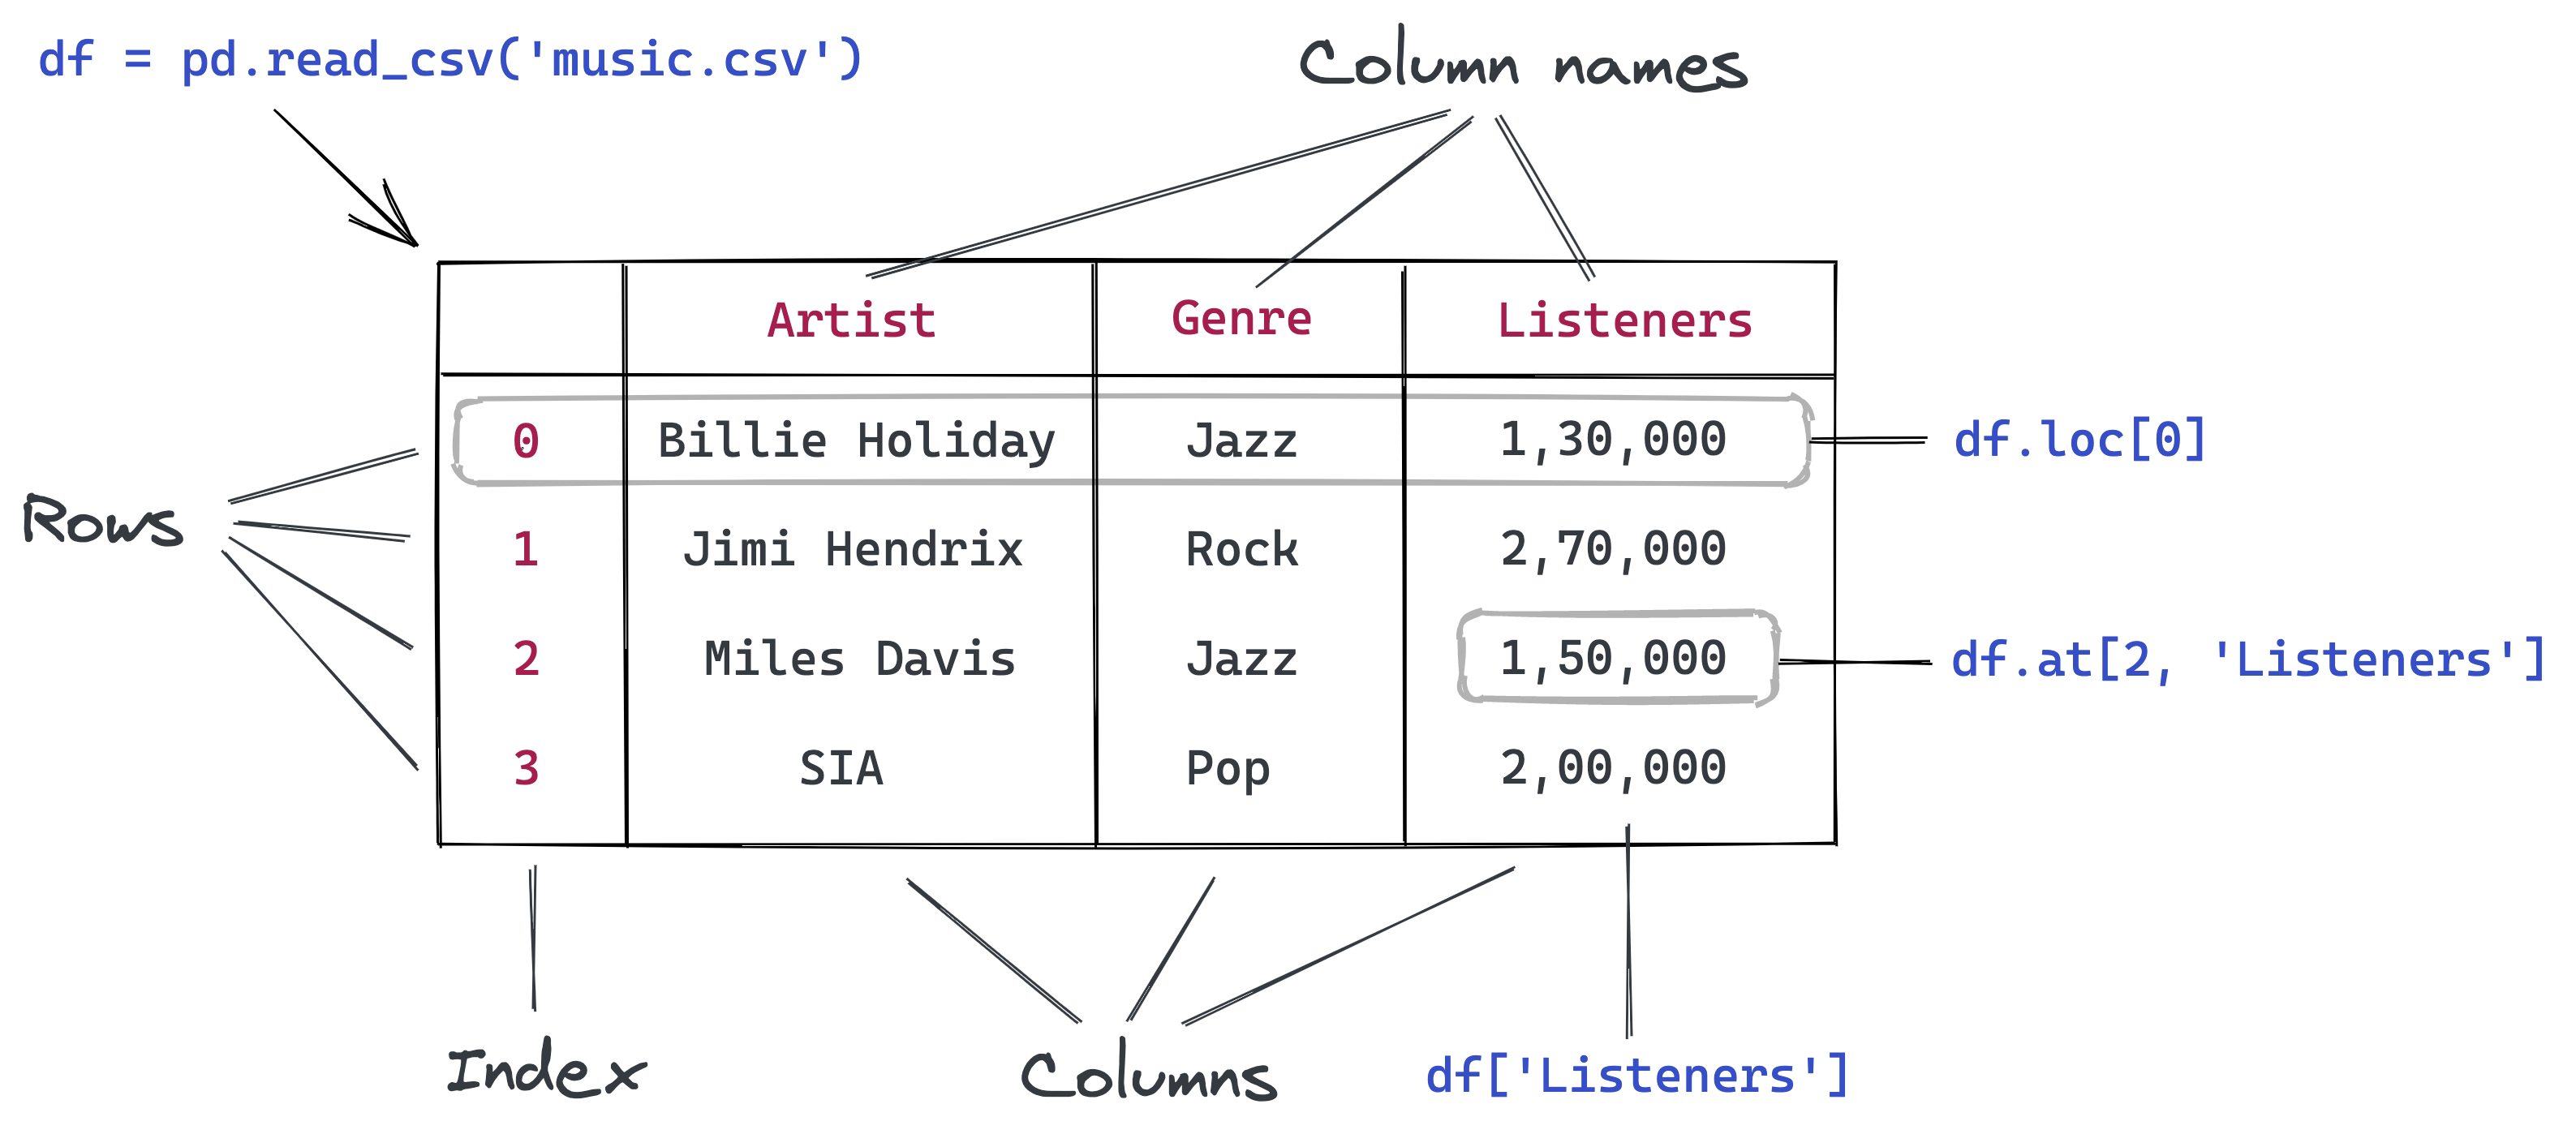

This tutorial series is a beginner-friendly introduction to programming and data analysis using the Python programming language. These tutorials take a practical and coding-focused approach. 

This tutorial covers the following topics:

*Reading a CSV file into a Pandas data frame

*Retrieving data from Pandas data frames

*Querying, sorting, and analyzing data

*Merging, grouping, and aggregation of data

*Extracting useful information from dates

*Basic plotting using line and bar charts

*Writing data frames to CSV files

### Reading a CSV file using Pandas
Pandas is a popular Python library used for working in tabular data (similar to the data stored in a spreadsheet). Pandas provides helper functions to read data from various file formats like CSV, Excel spreadsheets, HTML tables, JSON, SQL, and more. Let's download a file italy-covid-daywise.txt which contains day-wise Covid-19 data for Italy in the following format:

date,new_cases,new_deaths,new_tests 

2020-04-21,2256.0,454.0,28095.0 

2020-04-22,2729.0,534.0,44248.0

2020-04-23,3370.0,437.0,37083.0

2020-04-24,2646.0,464.0,95273.0

2020-04-25,3021.0,420.0,38676.0

2020-04-26,2357.0,415.0,24113.0

2020-04-27,2324.0,260.0,26678.0
 
2020-04-28,1739.0,333.0,37554.0 
...
This format of storing data is known as comma-separated values or CSV.

CSVs: A comma-separated values (CSV) file is a delimited text file that uses a comma to separate values. Each line of the file is a data record. Each record consists of one or more fields, separated by commas. A CSV file typically stores tabular data (numbers and text) in plain text, in which case each line will have the same number of fields. (Wikipedia)

We'll download this file using the urlretrieve function from the urllib.request module.

In [1]:
from urllib.request import urlretrieve

In [2]:
italy_covid_url = italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'
urlretrieve(italy_covid_url, 'italy-covid-daywise.csv')

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x78307433f520>)

We can now import the pandas module. As a convention, it is imported with the alias pd.

In [3]:
import pandas as pd

In [4]:
covid_df = pd.read_csv('italy-covid-daywise.csv')

Data from the file is read and stored in a DataFrame object - one of the core data structures in Pandas for storing and working with tabular data. We typically use the _df suffix in the variable names for dataframes.

In [5]:
type(covid_df)

pandas.core.frame.DataFrame

In [6]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


Here's what we can tell by looking at the dataframe:

*The file provides four day-wise counts for COVID-19 in Italy

*The metrics reported are new cases, deaths, and tests

*Data is provided for 248 days: from Dec 12, 2019, to Sep 3, 2020

Keep in mind that these are officially reported numbers. The actual number of cases & deaths may be higher, as not all cases are diagnosed.

We can view some basic information about the data frame using the .info method.

In [7]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


It appears that each column contains values of a specific data type. You can view statistical information for numerical columns (mean, standard deviation, minimum/maximum values, and the number of non-empty values) using the .describe method.

In [8]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


The `columns` property contains the list of columns within the data frame.

In [9]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

You can also retrieve the number of rows and columns in the data frame using the .shape property

In [10]:
covid_df.shape

(248, 4)

Here's a summary of the functions & methods we've looked at so far:

.pd.read_csv - Read data from a CSV file into a Pandas DataFrame object

.info() - View basic infomation about rows, columns & data types

.describe() - View statistical information about numeric columns

.columns - Get the list of column names

.shape - Get the number of rows & columns as a tuple

### Retrieving data from a data frame
The first thing you might want to do is retrieve data from this data frame, e.g., the counts of a specific day or the list of values in a particular column. To do this, it might help to understand the internal representation of data in a data frame. Conceptually, you can think of a dataframe as a dictionary of lists: keys are column names, and values are lists/arrays containing data for the respective columns.

In [11]:
# Pandas  format is similar to this
covid_data_dict = {
    'date': ['2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03'],
    'new_cases': [1444, 1365, 996, 975, 1326],
    'new_deaths' : [1,4,6,8,6],
    'new_tests' :[53541, 42583, 54395, None, None]
}

Representing data in the above format has a few benefits:

.All values in a column typically have the same type of value, so it's more efficient to store them in a single array.

.Retrieving the values for a particular row simply requires extracting the elements at a given index from each column array.

.The representation is more compact (column names are recorded only once) compared to other formats that use a dictionary for each row of data (see the example below).

In [12]:
# Pandas format is not similar to this
covid_data_list = [
    {'date': '2020-08-30', 'new_cases': 1444, 'new_deaths': 1, 'new_tests': 53541},
    {'date': '2020-08-31', 'new_cases': 1365, 'new_deaths': 4, 'new_tests': 42583},
    {'date': '2020-09-01', 'new_cases': 996, 'new_deaths': 6, 'new_tests': 54395},
    {'date': '2020-09-02', 'new_cases': 975, 'new_deaths': 8 },
    {'date': '2020-09-03', 'new_cases': 1326, 'new_deaths': 6},
]

With the dictionary of lists analogy in mind, you can now guess how to retrieve data from a data frame. For example, we can get a list of values from a specific column using the `[]` indexing notation.

In [13]:
covid_data_dict['new_cases']

[1444, 1365, 996, 975, 1326]

In [14]:
covid_data_dict['new_tests']

[53541, 42583, 54395, None, None]

In [15]:
covid_df['new_cases']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [16]:
covid_df['new_tests']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
243    53541.0
244    42583.0
245    54395.0
246        NaN
247        NaN
Name: new_tests, Length: 248, dtype: float64

Each column is represented using a data structure called Series, which is essentially a numpy array with some extra methods and properties.

In [17]:
type(covid_df['new_cases'])

pandas.core.series.Series

Like arrays, you can retrieve a specific value with a series using the indexing notation [].

In [18]:
covid_df['new_cases'][246]

975.0

In [19]:
covid_df['new_cases'][240]

1366.0

In [20]:
covid_df['new_cases'][243]

1444.0

In [21]:
covid_df['new_tests'][243]

53541.0

In [22]:
covid_df['new_tests'][247]

nan

Pandas also provides the .at method to retrieve the element at a specific row & column directly.

In [23]:
covid_df.at[246, 'new_cases']

975.0

In [24]:
covid_df.at[240, 'new_tests']

57640.0

Instead of using the indexing notation [ ], Pandas also allows accessing columns as properties of the dataframe using the . notation. However, this method only works for columns whose names do not contain spaces or special characters.

In [25]:
# Same a covid_df['new_cases]
covid_df.new_cases 

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [26]:
covid_df.new_tests

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
243    53541.0
244    42583.0
245    54395.0
246        NaN
247        NaN
Name: new_tests, Length: 248, dtype: float64

Further, you can also pass a list of columns within the indexing notation [] to access a subset of the data frame with just the given columns.

In [27]:
cases_df = covid_df[['date', 'new_cases']]
cases_df

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


In [28]:
tests_df = covid_df[['date', 'new_tests']]
tests_df

,date,new_tests
0,2019-12-31,NaN
1,2020-01-01,NaN
2,2020-01-02,NaN
3,2020-01-03,NaN
4,2020-01-04,NaN
...,...,...
243,2020-08-30,53541.0
244,2020-08-31,42583.0
245,2020-09-01,54395.0
246,2020-09-02,NaN


The new data frame cases_df is simply a "view" of the original data frame covid_df. Both point to the same data in the computer's memory. Changing any values inside one of them will also change the respective values in the other. Sharing data between data frames makes data manipulation in Pandas blazing fast. You needn't worry about the overhead of copying thousands or millions of rows every time you want to create a new data frame by operating on an existing one.

Sometimes you might need a full copy of the data frame, in which case you can use the copy method.

In [29]:
covid_df.copy = covid_df.copy()

The data within covid_df_copy is completely separate from covid_df, and changing values inside one of them will not affect the other.

To access a specific row of data, Pandas provides the .loc method.

In [30]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [31]:
covid_df.loc[243]

date          2020-08-30
new_cases           1444
new_deaths             1
new_tests          53541
Name: 243, dtype: object

In [32]:
covid_df.loc[245]

date          2020-09-01
new_cases            996
new_deaths             6
new_tests          54395
Name: 245, dtype: object

In [33]:
covid_df.loc[246]

date          2020-09-02
new_cases            975
new_deaths             8
new_tests            NaN
Name: 246, dtype: object

Each retrieved row is also a Series object.

In [34]:
type[covid_df.loc[243]]

type[date          2020-08-30
new_cases           1444
new_deaths             1
new_tests          53541
Name: 243, dtype: object]

We can use the .head and .tail methods to view the first or last few rows of data.

In [35]:
covid_df.head(5)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [36]:
covid_df.head(4)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN


In [37]:
covid_df.head(3)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN


Notice above that while the first few values in the new_cases and new_deaths columns are 0, the corresponding values within the new_tests column are NaN. That is because the CSV file does not contain any data for the new_tests column for specific dates (you can verify this by looking into the file). These values may be missing or unknown.

In [38]:
covid_df.at[0, 'new_tests']

nan

In [39]:
type(covid_df.at[0, 'new_tests'])

numpy.float64

The distinction between 0 and NaN is subtle but important. In this dataset, it represents that daily test numbers were not reported on specific dates. Italy started reporting daily tests on Apr 19, 2020. 93,5310 tests had already been conducted before Apr 19.

We can find the first index that doesn't contain a NaN value using a column's first_valid_index method.

In [40]:
covid_df.new_tests.first_valid_index()

111

Let's look at a few rows before and after this index to verify that the values change from NaN to actual numbers. We can do this by passing a range to loc.

In [41]:
covid_df.loc[108:113]

,date,new_cases,new_deaths,new_tests
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0


In [42]:
covid_df.loc[113:123]

,date,new_cases,new_deaths,new_tests
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
115,2020-04-24,2646.0,464.0,95273.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
119,2020-04-28,1739.0,333.0,37554.0
120,2020-04-29,2091.0,382.0,38589.0
121,2020-04-30,2086.0,323.0,41441.0
122,2020-05-01,1872.0,285.0,43732.0


We can use the `.sample` method to retrieve a random sample of rows from the data frame.

In [43]:
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests
167,2020-06-15,338.0,44.0,17463.0
26,2020-01-26,0.0,0.0,NaN
114,2020-04-23,3370.0,437.0,37083.0
71,2020-03-11,977.0,167.0,NaN
7,2020-01-07,0.0,0.0,NaN
8,2020-01-08,0.0,0.0,NaN
123,2020-05-02,1965.0,269.0,31231.0
38,2020-02-07,0.0,0.0,NaN
119,2020-04-28,1739.0,333.0,37554.0
173,2020-06-21,264.0,49.0,24581.0


In [44]:
covid_df.sample(6)

,date,new_cases,new_deaths,new_tests
158,2020-06-06,518.0,85.0,34036.0
154,2020-06-02,178.0,60.0,25628.0
133,2020-05-12,744.0,179.0,39620.0
129,2020-05-08,1401.0,274.0,45428.0
14,2020-01-14,0.0,0.0,NaN
174,2020-06-22,224.0,24.0,16152.0


### Analyzing data from data frames
Let's try to answer some questions about our data.

Q: What are the total number of reported cases and deaths related to Covid-19 in Italy?

Similar to Numpy arrays, a Pandas series supports the sum method to answer these questions.

In [45]:
total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()

In [46]:
total_cases

271515.0

In [47]:
total_deaths

35497.0

In [48]:
print('The number of reported cases is {} and the number of reported deaths is {}.'.format(int(total_cases), int(total_deaths)))

The number of reported cases is 271515 and the number of reported deaths is 35497.


Q: What is the overall death rate (ratio of reported deaths to reported cases)?

In [49]:
death_rate = covid_df.new_deaths.sum()/covid_df.new_cases.sum()

In [50]:
death_rate

0.13073679170579894

In [51]:
print("The overall reported death rate in Italy is {:.2f} %.".format(death_rate*100))

The overall reported death rate in Italy is 13.07 %.


Q: What is the overall number of tests conducted? A total of 935310 tests were conducted before daily test numbers were reported.

In [52]:
inicial_tests = 935310
total_tests = inicial_tests + covid_df.new_tests.sum()

In [53]:
total_tests

5214766.0

Q: What fraction of tests returned a positive result?

In [54]:
positive_rate = total_cases  / total_tests

In [55]:
positive_rate

0.05206657403227681

In [56]:
print('{:.2f}% of tests in Italy led to a positive diagnosis.'.format(positive_rate*100))

5.21% of tests in Italy led to a positive diagnosis.


Q:What is the death ratio of the total test?

In [57]:
Ratio_total_deaths = total_tests/death_rate

In [58]:
Ratio_total_deaths

39887516.98706933

In [59]:
print("The ratio of death rate reported in Italy is {:.2f} %.".format(death_rate*100))

The ratio of death rate reported in Italy is 13.07 %.


### Querying and sorting rows
Let's say we want only want to look at the days which had more than 1000 reported cases. We can use a boolean expression to check which rows satisfy this criterion.

In [60]:
hight_new_cases = covid_df.new_cases > 1000

In [61]:
hight_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

The boolean expression returns a series containing True and False boolean values. You can use this series to select a subset of rows from the original dataframe, corresponding to the True values in the series.

In [62]:
covid_df[hight_new_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


We can write this succinctly on a single line by passing the boolean expression as an index to the data frame.



In [63]:
high_cases_df = covid_df[covid_df.new_cases > 1000]
high_cases_df

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


The data frame contains 72 rows, but only the first & last five rows are displayed by default with Jupyter for brevity. We can change some display options to view all the rows.

In [64]:
from IPython.display import display
with pd.option_context('display.max_rows', 100):
    display(covid_df[covid_df.new_cases > 1000])

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


In [65]:
with pd.option_context('display.max_rows', 100):
    display(high_cases_df)

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


In [66]:
with pd.option_context('display.max_rows', 79):
    display(covid_df[covid_df.new_cases > 1000])

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


In [67]:
with pd.option_context('display.max_rows', 79):
    display(high_cases_df)

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


In [68]:
with pd.option_context('display.max_rows', 39):
    display(high_cases_df)

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


We can also formulate more complex queries that involve multiple columns. As an example, let's try to determine the days when the ratio of cases reported to tests conducted is higher than the overall positive_rate.

In [69]:
positive_rate

0.05206657403227681

In [70]:
high_ratio_df = covid_df[covid_df.new_cases / covid_df.new_tests > positive_rate]
high_ratio_df

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


The result of performing an operation on two columns is a new series.

In [71]:
covid_df.new_cases / covid_df.new_tests

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
243    0.026970
244    0.032055
245    0.018311
246         NaN
247         NaN
Length: 248, dtype: float64

We can use this series to add a new column to the data frame.

In [72]:
covid_df['positive_rate'] = covid_df.new_cases / covid_df.new_tests

In [73]:
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


However, keep in mind that sometimes it takes a few days to get the results for a test, so we can't compare the number of new cases with the number of tests conducted on the same day. Any inference based on this positive_rate column is likely to be incorrect. It's essential to watch out for such subtle relationships that are often not conveyed within the CSV file and require some external context. It's always a good idea to read through the documentation provided with the dataset or ask for more information.

For now, let's remove the positive_rate column using the drop method.

In [74]:
covid_df.drop(columns = ['positive_rate'], inplace=True)

In [75]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [76]:
covid_df['new_cases_tests'] = covid_df.new_cases + covid_df.new_tests

In [77]:
covid_df

,date,new_cases,new_deaths,new_tests,new_cases_tests
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,54985.0
244,2020-08-31,1365.0,4.0,42583.0,43948.0
245,2020-09-01,996.0,6.0,54395.0,55391.0
246,2020-09-02,975.0,8.0,NaN,NaN


In [78]:
covid_df.drop(columns= ['new_cases_tests'], inplace=True)

In [79]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [80]:
covid_df['double_new_cases'] = covid_df.new_cases * 2


In [81]:
covid_df

,date,new_cases,new_deaths,new_tests,double_new_cases
0,2019-12-31,0.0,0.0,NaN,0.0
1,2020-01-01,0.0,0.0,NaN,0.0
2,2020-01-02,0.0,0.0,NaN,0.0
3,2020-01-03,0.0,0.0,NaN,0.0
4,2020-01-04,0.0,0.0,NaN,0.0
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2888.0
244,2020-08-31,1365.0,4.0,42583.0,2730.0
245,2020-09-01,996.0,6.0,54395.0,1992.0
246,2020-09-02,975.0,8.0,NaN,1950.0


In [82]:

covid_df.drop(columns= ['double_new_cases'], inplace=True)

In [83]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


Can you figure the purpose of the inplace argument?

### Sorting rows using column values
The rows can also be sorted by a specific column using .sort_values. Let's sort to identify the days with the highest number of cases, then chain it with the head method to list just the first ten results.

In [84]:
covid_df.sort_values('new_cases', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


In [85]:
covid_df.sort_values('new_tests', ascending=False).head(6)

,date,new_cases,new_deaths,new_tests
115,2020-04-24,2646.0,464.0,95273.0
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
239,2020-08-26,876.0,4.0,58054.0
240,2020-08-27,1366.0,13.0,57640.0
245,2020-09-01,996.0,6.0,54395.0


It looks like the last two weeks of March had the highest number of daily cases. Let's compare this to the days where the highest number of deaths were recorded.

In [86]:
covid_df.sort_values('new_deaths', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
88,2020-03-28,5959.0,971.0,NaN
89,2020-03-29,5974.0,887.0,NaN
92,2020-04-01,4053.0,839.0,NaN
91,2020-03-31,4050.0,810.0,NaN
82,2020-03-22,6557.0,795.0,NaN
95,2020-04-04,4585.0,764.0,NaN
94,2020-04-03,4668.0,760.0,NaN
90,2020-03-30,5217.0,758.0,NaN
85,2020-03-25,5249.0,743.0,NaN
93,2020-04-02,4782.0,727.0,NaN


It appears that daily deaths hit a peak just about a week after the peak in daily new cases.

Let's also look at the days with the least number of cases. We might expect to see the first few days of the year on this list.

In [87]:
covid_df.sort_values('new_cases').head(10)

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
34,2020-02-03,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


It seems like the count of new cases on Jun 20, 2020, was -148, a negative number! Not something we might have expected, but that's the nature of real-world data. It could be a data entry error, or the government may have issued a correction to account for miscounting in the past. Can you dig through news articles online and figure out why the number was negative?

Let's look at some days before and after Jun 20, 2020.

In [88]:
covid_df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,-148.0,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


For now, let's assume this was indeed a data entry error. We can use one of the following approaches for dealing with the missing or faulty value:

1-Replace it with 0.

2-Replace it with the average of the entire column.

3-Replace it with the average of the values on the previous & next date.

4-Discard the row entirely.

Which approach you pick requires some context about the data and the problem. In this case, since we are dealing with data ordered by date, we can go ahead with the third approach.

You can use the .at method to modify a specific value within the dataframe.

In [89]:
covid_df.at[172, 'new_cases'] = (covid_df.at[171, 'new_cases'] + covid_df.at[173, 'new_cases'])/2

In [90]:
covid_df.loc[170:175]

,date,new_cases,new_deaths,new_tests
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,297.5,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


### Working with dates
While we've looked at overall numbers for the cases, tests, positive rate, etc., it would also be useful to study these numbers on a month-by-month basis. The date column might come in handy here, as Pandas provides many utilities for working with dates.

In [91]:
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

The data type of date is currently object, so Pandas does not know that this column is a date. We can convert it into a datetime column using the pd.to_datetime method.



In [92]:
covid_df['date'] = pd.to_datetime(covid_df.date)

In [93]:
covid_df['date']

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

You can see that it now has the datatype datetime64. We can now extract different parts of the data into separate columns, using the DatetimeIndex class 

In [94]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [95]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


Let's check the overall metrics for May. We can query the rows for May, choose a subset of columns, and use the sum method to aggregate each selected column's values.

In [96]:
# Query the rows for May
covid_df_may = covid_df[covid_df.month == 5]
covid_df_may

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
122,2020-05-01,1872.0,285.0,43732.0,2020,5,1,4
123,2020-05-02,1965.0,269.0,31231.0,2020,5,2,5
124,2020-05-03,1900.0,474.0,27047.0,2020,5,3,6
125,2020-05-04,1389.0,174.0,22999.0,2020,5,4,0
126,2020-05-05,1221.0,195.0,32211.0,2020,5,5,1
127,2020-05-06,1075.0,236.0,37771.0,2020,5,6,2
128,2020-05-07,1444.0,369.0,13665.0,2020,5,7,3
129,2020-05-08,1401.0,274.0,45428.0,2020,5,8,4
130,2020-05-09,1327.0,243.0,36091.0,2020,5,9,5
131,2020-05-10,1083.0,194.0,31384.0,2020,5,10,6


In [97]:
# Extract the subset of columns to be aggregated
covid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]
covid_df_may_metrics

,new_cases,new_deaths,new_tests
122,1872.0,285.0,43732.0
123,1965.0,269.0,31231.0
124,1900.0,474.0,27047.0
125,1389.0,174.0,22999.0
126,1221.0,195.0,32211.0
127,1075.0,236.0,37771.0
128,1444.0,369.0,13665.0
129,1401.0,274.0,45428.0
130,1327.0,243.0,36091.0
131,1083.0,194.0,31384.0


In [98]:
# Get the column-wise sum
covid_may_totals = covid_df_may_metrics.sum()
covid_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [99]:
type(covid_may_totals)

pandas.core.series.Series

We can also combine the above operations into a single statement.

In [100]:
covid_df[covid_df.month == 5][['new_cases', 'new_deaths', 'new_tests']].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

As another example, let's check if the number of cases reported on Sundays is higher than the average number of cases reported every day. This time, we might want to aggregate columns using the .mean method.

In [101]:
# Overal average
covid_df.new_cases.mean()

1096.6149193548388

In [102]:
# Average for  Sunday
covid_df[covid_df.weekday ==6].new_cases.mean()

1247.2571428571428

It seems like more cases were reported on Sundays compared to other days.

Try asking and answering some more date-related questions about the data using the cells below.

In [103]:
covid_df_march = covid_df[covid_df.month == 3]
covid_df_march

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
61,2020-03-01,240.0,8.0,NaN,2020,3,1,6
62,2020-03-02,561.0,6.0,NaN,2020,3,2,0
63,2020-03-03,347.0,17.0,NaN,2020,3,3,1
64,2020-03-04,466.0,28.0,NaN,2020,3,4,2
65,2020-03-05,587.0,27.0,NaN,2020,3,5,3
66,2020-03-06,769.0,41.0,NaN,2020,3,6,4
67,2020-03-07,778.0,49.0,NaN,2020,3,7,5
68,2020-03-08,1247.0,36.0,NaN,2020,3,8,6
69,2020-03-09,1492.0,133.0,NaN,2020,3,9,0
70,2020-03-10,1797.0,98.0,NaN,2020,3,10,1


In [104]:
# Overal average
covid_df.new_tests.mean()

31699.674074074075

In [105]:
# Average of new tests for Tuesdays
covid_df[covid_df.weekday == 2].new_tests.mean()

34665.21052631579

In [106]:
# Average of new tests for Thursday
covid_df[covid_df.weekday == 3].new_tests.mean()

34488.57894736842

In [107]:
covid_df[covid_df.weekday == 7].new_tests.mean()

nan

### Grouping and aggregation
As a next step, we might want to summarize the day-wise data and create a new dataframe with month-wise data. We can use the groupby function to create a group for each month, select the columns we wish to aggregate, and aggregate them using the sum method.

In [108]:
monthly_grp = covid_df.groupby('month')

In [109]:
monthly_grp[['new_cases', 'new_deaths', 'new_tests']]

In [110]:
monthly_grp[['new_cases', 'new_deaths', 'new_tests']].sum()

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [111]:
covid_month_df =  covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


The result is a new data frame that uses unique values from the column passed to groupby as the index. Grouping and aggregation is a powerful method for progressively summarizing data into smaller data frames.

Instead of aggregating by sum, you can also aggregate by other measures like mean. Let's compute the average number of daily new cases, deaths, and tests for each month.

In [112]:
covid_month_mean_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].mean()
covid_month_mean_df

,new_cases,new_deaths,new_tests
month,,,
1,0.096774,0.000000,NaN
2,30.517241,0.724138,NaN
3,3253.258065,373.225806,NaN
4,3395.066667,536.366667,38144.636364
5,937.838710,182.516129,34797.419355
6,273.916667,46.800000,27678.466667
7,216.838710,12.516129,25732.000000
8,679.354839,11.129032,35442.064516
9,1099.000000,6.666667,54395.000000


In [113]:
covid_weekday_mean_df = covid_df.groupby('weekday')[['new_cases', 'new_deaths', 'new_tests']].mean()
covid_weekday_mean_df

,new_cases,new_deaths,new_tests
weekday,,,
0,1109.142857,124.800000,19826.700000
1,918.638889,129.944444,31166.900000
2,927.305556,144.750000,34665.210526
3,1095.666667,141.472222,34488.578947
4,1189.714286,144.885714,39225.684211
5,1198.528571,157.000000,34589.473684
6,1247.257143,159.457143,28588.105263


In [114]:
covid_day_mean_df = covid_df.groupby('day')[['new_cases', 'new_deaths', 'new_tests']].mean()
covid_day_mean_df

,new_cases,new_deaths,new_tests
day,,,
1,893.000000,138.333333,35482.00
2,993.111111,121.777778,27625.50
3,999.777778,150.000000,21557.25
4,892.875000,133.000000,25721.75
5,901.875000,127.125000,30896.50
6,906.750000,113.250000,29436.75
7,837.500000,142.500000,23610.25
8,821.625000,125.000000,29259.75
9,934.375000,126.125000,30252.75


In [115]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


Apart from grouping, another form of aggregation is the running or cumulative sum of cases, tests, or death up to each row's date. We can use the cumsum method to compute the cumulative sum of a column as a new series. Let's add three new columns: total_cases, total_deaths, and total_tests.

In [116]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()


In [117]:
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()


In [118]:
covid_df['total_tests'] = covid_df.new_tests.cumsum() + inicial_tests

In [119]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN


Notice how the `NaN` values in the `total_tests` column remain unaffected.

### Merging data from multiple sources
To determine other metrics like test per million, cases per million, etc., we require some more information about the country, viz. its population. Let's download another file locations.csv that contains health-related information for many countries, including Italy.

In [120]:
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x78304d323e50>)

In [121]:
locations_df = pd.read_csv('locations.csv')

In [122]:
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [123]:
locations_df[locations_df.location == 'Italy']

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


We can merge this data into our existing data frame by adding more columns. However, to merge two data frames, we need at least one common column. Let's insert a location column in the covid_df dataframe with all values set to "Italy".

In [124]:
covid_df['location'] = 'Italy'
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy


We can now add the columns from locations_df into covid_df using the .merge method.

In [125]:
merged_df = covid_df.merge(locations_df, on='location')
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


The location data for Italy is appended to each row within covid_df. If the covid_df data frame contained data for multiple locations, then the respective country's location data would be appended for each row.

We can now calculate metrics like cases per million, deaths per million, and tests per million.

In [126]:
merged_df['cases_per_millions'] = merged_df.total_cases * 1e6 / merged_df.population

In [127]:
merged_df['cases_per_millions'] = merged_df.total_deaths * 1e6 / merged_df.population

In [128]:
merged_df['cases_per_millions'] = merged_df.total_tests * 1e6 / merged_df.population

In [129]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_millions
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,84644.943252
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,85349.238862
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,86248.897403
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,NaN


save this notebook